<a href="https://colab.research.google.com/github/rkdwogns/TIS/blob/main/0306.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

np.random.seed(5)

X = iris.data # 입력 데이터
Y = iris.target # 타깃 데이터

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9416666666666667


In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.10809762 0.03038681 0.43999397 0.42152159]


In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.9166666666666666


In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9895833333333334 0.9416666666666668


In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(RandomForestClassifier(random_state=42), rf, n_jobs=-1)

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(LGBMClassifier(random_state=42), rf, n_jobs=-1)

In [ ]:
# 사진을 '낮'과 '밤', '실내'와 '실외'로 구분하려는 문제는 각각 두 개의 이진 분류 문제입니다. 
# 따라서 로지스틱 회귀 분류 모델을 두 개 만들거나, 하나의 소프트맥스 회귀 분류 모델을 만들어서 두 개의 문제를 한 번에 해결할 수 있습니다.

# 로지스틱 회귀 분류 모델을 두 개 만들 경우, 하나는 '낮'과 '밤'을 구분하는 이진 분류 모델이 되고, 다른 하나는 '실내'와 '실외'를 구분하는 이진 분류 모델이 됩니다. 
# 이 경우, 두 모델은 독립적으로 학습되고 예측되므로, 한 모델의 학습 결과가 다른 모델에 영향을 미치지 않습니다.

# 반면, 소프트맥스 회귀 분류 모델을 만들 경우, '낮', '밤', '실내', '실외'를 포함한 4개의 클래스를 가지는 다중 분류 문제로 해결됩니다. 
# 이 경우, 하나의 모델에서 4개의 클래스에 대한 예측을 동시에 수행할 수 있습니다.

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


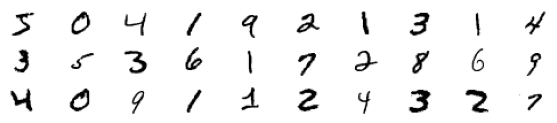

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 10, figsize=(10,2))

for i in range(3):
  for j in range(10):
    axs[i,j].imshow(train_input[i*10+j], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.25, random_state=42)

In [ ]:
print(val_scaled.shape, val_target.shape)

(15000, 784) (15000,)


In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
dense3 = keras.layers.Dense(100, activation='relu', input_shape=(784,))
dense4 = keras.layers.Dense(10, activation='softmax')

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2 = keras.Sequential([dense3, dense4])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1091 - accuracy: 0.9684
Epoch 2/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0955 - accuracy: 0.9719
Epoch 3/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9760
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0768 - accuracy: 0.9784
Epoch 5/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0691 - accuracy: 0.9810


In [ ]:
model.evaluate(val_scaled, val_target)

469/469 [==============================] - 2s 3ms/step - loss: 0.1021 - accuracy: 0.9695


[0.10205806791782379, 0.9695333242416382]

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model2.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.9133
Epoch 2/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1493 - accuracy: 0.9566
Epoch 3/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1081 - accuracy: 0.9692
Epoch 4/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0849 - accuracy: 0.9763
Epoch 5/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0694 - accuracy: 0.9796


In [ ]:
model2.evaluate(val_scaled, val_target)

469/469 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9720


[0.10407049208879471, 0.972000002861023]

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

dense = Dense(units=1, input_shape=[1])
model3 = Sequential([dense])

model3.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0], dtype=float)
ys = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0], dtype=float)

model3.fit(xs, ys, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27262404.0000
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 1947161722880.0000
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 126200183699537920.0000
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 10606394831322956693504.0000
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 677028785431449516338315264.0000
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 45806827946624499036787855851520.0000
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 3427761132670688406783575504147447808.0000
Epoch 8/500
2/2 [==============================] - 0s 11ms/step - loss: inf
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: inf
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: inf
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - loss: inf
